In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import date
from pandas_datareader import data as pdr
import yfinance as yf


In [30]:
# start=datetime(2020,12,1)
# end=datetime(2022,12,15)
yf.pdr_override()
start='2010-11-01'
end='2022-12-12'
df=pdr.get_data_yahoo("AAPL",start,end)


[*********************100%***********************]  1 of 1 completed


In [31]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,10.793571,10.914286,10.792857,10.863571,9.260303,423889200
2010-11-02,10.964286,11.078214,10.964286,11.048571,9.417996,433930000
2010-11-03,11.120357,11.174286,11.018929,11.171429,9.522728,508348400
2010-11-04,11.266071,11.435000,11.251071,11.366786,9.689248,642488000
2010-11-05,11.356786,11.413214,11.312500,11.326071,9.654544,361253200


In [32]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,142.160004,76097000


In [33]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-01,10.793571,10.914286,10.792857,10.863571,9.260303,423889200
1,2010-11-02,10.964286,11.078214,10.964286,11.048571,9.417996,433930000
2,2010-11-03,11.120357,11.174286,11.018929,11.171429,9.522728,508348400
3,2010-11-04,11.266071,11.435000,11.251071,11.366786,9.689248,642488000
4,2010-11-05,11.356786,11.413214,11.312500,11.326071,9.654544,361253200


In [34]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,10.793571,10.914286,10.792857,10.863571,423889200
1,10.964286,11.078214,10.964286,11.048571,433930000
2,11.120357,11.174286,11.018929,11.171429,508348400
3,11.266071,11.435000,11.251071,11.366786,642488000
4,11.356786,11.413214,11.312500,11.326071,361253200


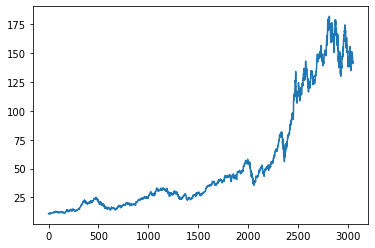

In [35]:
plt.plot(df.Close)

In [36]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3044    152.940799
3045    152.868199
3046    152.806899
3047    152.723399
3048    152.614599
Name: Close, Length: 3049, dtype: float64

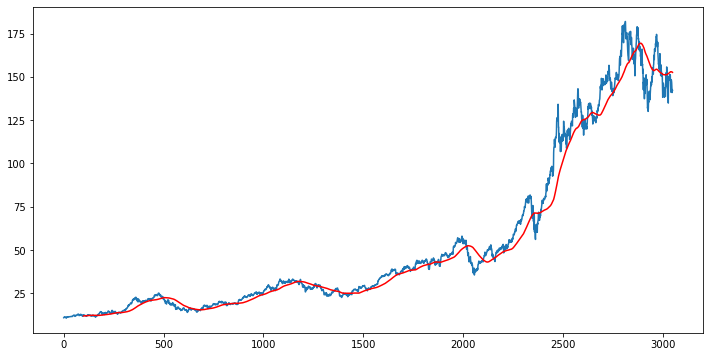

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [38]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3044    153.85670
3045    153.73475
3046    153.61785
3047    153.53075
3048    153.42785
Name: Close, Length: 3049, dtype: float64

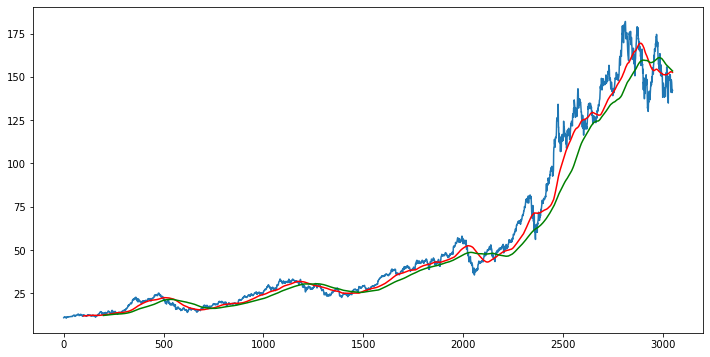

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [40]:
df.shape

(3049, 5)

In [41]:
#split data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2134, 1)
(915, 1)


In [42]:
data_training.head()

,Close
0,10.863571
1,11.048571
2,11.171429
3,11.366786
4,11.326071


In [43]:
data_testing.head()

,Close
2134,51.075001
2135,51.152500
2136,50.167500
2137,52.630001
2138,52.287498


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [45]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00277946],
       [0.00669186],
       [0.00929009],
       ...,
       [0.86999141],
       [0.86829959],
       [0.85835992]])

In [46]:
# x_train=[]
# y_train=[]
# for i in range(100,data_training_array.shape[0]):
#     x_train=np.append(x_train,data_training_array[i-100:i])#changed
#     y_train=np.append(y_train,data_training_array[i,0])
#     x_train,y_train=np.array(x_train),np.array(y_train)
x_train=[]
y_train=[] 

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
   
x_train=np.array(x_train)
y_train=np.array(y_train)
# When return_sequences parameter is True, it’ll output all of the hidden states of every time steps

In [47]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))#to prevent from overfitting 

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')#rms
model.fit(x_train,y_train,epochs=50)#model kitni baar train hoga refined hoga

Epoch 1/50
64/64 [==============================] - 19s 212ms/step - loss: 0.0388
Epoch 2/50
64/64 [==============================] - 14s 213ms/step - loss: 0.0075
Epoch 3/50
64/64 [==============================] - 14s 218ms/step - loss: 0.0071
Epoch 4/50
64/64 [==============================] - 14s 212ms/step - loss: 0.0055
Epoch 5/50
64/64 [==============================] - 14s 213ms/step - loss: 0.0056
Epoch 6/50
64/64 [==============================] - 13s 206ms/step - loss: 0.0048
Epoch 7/50
64/64 [==============================] - 14s 216ms/step - loss: 0.0049
Epoch 8/50
64/64 [==============================] - 14s 215ms/step - loss: 0.0045
Epoch 9/50
64/64 [==============================] - 14s 212ms/step - loss: 0.0047
Epoch 10/50
64/64 [==============================] - 14s 213ms/step - loss: 0.0045
Epoch 11/50
64/64 [==============================] - 13s 207ms/step - loss: 0.0040
Epoch 12/50
64/64 [==============================] - 14s 215ms/step - loss: 0.0038
Epoch 13/50
6

In [31]:
model.save('keras_model.h5')

In [32]:
data_testing.head()

,Close
2134,51.075001
2135,51.152500
2136,50.167500
2137,52.630001
2138,52.287498


In [49]:
df = pd.DataFrame(data_training)
past_100_days=df.tail(100)

In [34]:
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29128\1277850647.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


,Close
0,44.887501
1,44.645000
2,46.205002
3,44.172501
4,43.680000


In [35]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.06377059],
       [0.06211488],
       [0.07276608],
       ...,
       [0.71958697],
       [0.73126225],
       [0.72791675]])

In [36]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [37]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [38]:
x_test.shape

(915, 100, 1)

In [39]:
y_pred=model.predict(x_test)

29/29 [==============================] - 2s 59ms/step


In [40]:
y_pred.shape

(915, 1)

In [41]:
 scaler.scale_

array([0.00682769])

In [42]:
scale_factor=1/0.00682769
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

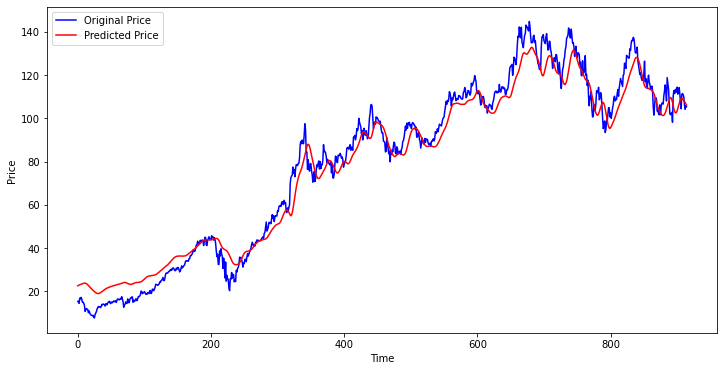

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

array([[1.47049073, 1.4631878 , 1.5617679 , ..., 0.21664772, 0.21318873,
        0.21416855],
       [1.48179498, 1.47443591, 1.57377383, ..., 0.21831318, 0.2148276 ,
        0.21581495],
       [1.49232321, 1.48491186, 1.58495558, ..., 0.2198643 , 0.21635396,
        0.21734832],
       ...,
       [6.9902503 , 6.95553449, 7.42415325, ..., 1.02987509, 1.01343217,
        1.0180899 ],
       [6.95669853, 6.92214936, 7.38851884, ..., 1.0249319 , 1.00856791,
        1.01320328],
       [6.91819865, 6.88384067, 7.34762917, ..., 1.01925971, 1.00298627,
        1.00759599]])